In [1]:
from gensim.models import word2vec
import matplotlib.pyplot as plt
from pyvi import ViTokenizer
import pandas as pd
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# %cd /content/drive/My Drive/Colab Notebooks/Text_Generator

In [4]:
# %ls -la

## Import and normalize data

In [5]:
news = pd.read_csv('./data/vnexpress/csv/vnexpress.csv').drop(columns='Unnamed: 0', axis=1)
news.head()

,article_id,content,topic,sub-topic,title,description
0,0,Người mẹ 42 tuổi ở Đà Nẵng vội vã tra hỏi và v...,doi-song,to-am,Cha mẹ học về giáo dục giới tính để dạy con,Nghe con trai 14 tuổi nói đã làm cho chị hàng ...
1,1,"Vợ chồng người phụ nữ ở Mỹ Đức, Hà Nội luôn tự...",doi-song,to-am,Nỗi lòng của phụ huynh có con mang thai tuổi đ...,Khi con gái đang là sinh viên năm nhất một trư...
2,2,"Kati Morton, nhà trị liệu hôn nhân và gia đình...",doi-song,to-am,Giải mã 'Hội chứng con gái đầu lòng',"""Hội chứng con gái đầu lòng"" cho rằng con gái ..."
3,3,"Anh Thắng, chủ tịch Hội làm vườn tỉnh Nghệ An ...",doi-song,to-am,Vườn sân thượng như khu rừng giải nhiệt mùa hè,Nghệ AnMuốn hạ nhiệt cho ngôi nhà khi nắng nón...
4,4,"Vừa kết thúc môn tiếng Anh, Phương bị sốt cao,...",doi-song,to-am,Nghị lực của cô bé ung thư,"Hà NamMột tuần trước, cô bé 14 tuổi từ Bệnh vi..."


In [6]:
news['tag'] = news['content'] + news['topic'] + news['sub-topic'] + news['title'] + news['description']
news.drop(columns=['description','sub-topic','content'], inplace=True)

In [7]:
news.head()

,article_id,topic,title,tag
0,0,doi-song,Cha mẹ học về giáo dục giới tính để dạy con,Người mẹ 42 tuổi ở Đà Nẵng vội vã tra hỏi và v...
1,1,doi-song,Nỗi lòng của phụ huynh có con mang thai tuổi đ...,"Vợ chồng người phụ nữ ở Mỹ Đức, Hà Nội luôn tự..."
2,2,doi-song,Giải mã 'Hội chứng con gái đầu lòng',"Kati Morton, nhà trị liệu hôn nhân và gia đình..."
3,3,doi-song,Vườn sân thượng như khu rừng giải nhiệt mùa hè,"Anh Thắng, chủ tịch Hội làm vườn tỉnh Nghệ An ..."
4,4,doi-song,Nghị lực của cô bé ung thư,"Vừa kết thúc môn tiếng Anh, Phương bị sốt cao,..."


In [8]:
news.isna().sum()

article_id     0
topic          0
title          4
tag           10
dtype: int64

In [9]:
news.dropna(axis=0, inplace=True)

In [10]:
news['tag'] = news['tag'].apply(lambda x: x.lower())
news['tag'] = news['tag'].apply(ViTokenizer.tokenize)

In [11]:
news

,article_id,topic,title,tag
0,0,doi-song,Cha mẹ học về giáo dục giới tính để dạy con,người mẹ 42 tuổi ở đà_nẵng vội_vã tra_hỏi và v...
1,1,doi-song,Nỗi lòng của phụ huynh có con mang thai tuổi đ...,"vợ_chồng người phụ_nữ ở mỹ đức , hà_nội luôn t..."
2,2,doi-song,Giải mã 'Hội chứng con gái đầu lòng',"kati morton , nhà trị_liệu hôn_nhân và gia_đìn..."
3,3,doi-song,Vườn sân thượng như khu rừng giải nhiệt mùa hè,"anh thắng , chủ_tịch hội làm_vườn tỉnh nghệ_an..."
4,4,doi-song,Nghị lực của cô bé ung thư,"vừa kết_thúc môn tiếng anh , phương bị sốt cao..."
...,...,...,...,...
1342,1342,thoi-su,"Vì sao cấm xe tải nặng, xe khách đi cao tốc Ca...","từ ngày 4 / 4 , xe_khách trên 30 chỗ , xe giườ..."
1343,1343,thoi-su,Gần 1.000 tỷ nâng cấp đường nối Phan Thiết với...,dự_án đang được ubnd tỉnh xem_xét trình hđnd t...
1344,1344,thoi-su,Hai tỉnh không đồng tình cấm xe trên 30 tấn đi...,"ngày 1 / 4 , ban an_toàn giao_thông tỉnh thừa ..."
1345,1345,thoi-su,Hơn 10.000 tỷ đồng đầu tư mở rộng cao tốc hai ...,nhằm đồng_bộ các dự_án cao_tốc bắc_nam 4 làn x...


In [12]:
news.to_csv('./data/vnexpress/csv/vnexpress_01.csv')

## Create Word2Vec model and find similarity documents

In [12]:
sequences = news['tag'].to_list()
input_gensim = []

for sen in sequences:
  input_gensim.append(sen.split())

In [14]:
model = word2vec.Word2Vec(input_gensim, vector_size=50, window=5, min_count=0, workers=4, sg=1)
# model.save("./model/word.model")

In [13]:
model = word2vec.Word2Vec.load("./model/word.model")

In [22]:
question = 'amy morin là ai'

def embedding(question, input_gensim, length):
  question_tokens = ViTokenizer.tokenize(question)
  print('After tonkenized:', question_tokens)
  
  # Word embeddings
  question_embeddings = [model.wv[word] for word in question_tokens.split() if word in model.wv]

  # Post embeddings
  post_check = input_gensim[:length]

  post_embeddings = []
  for post in post_check:
    post_embedding = [model.wv[word] for word in post if word in model.wv]
    post_embeddings.append(post_embedding)

  return question_embeddings, post_embeddings

question_embeddings, post_embeddings = embedding(question, input_gensim, len(input_gensim))

After tonkenized: amy morin là ai


In [23]:
print(len(question_embeddings))
question_embeddings[0]

4


array([-0.25704497, -0.05096927, -0.12761207,  0.13429321, -0.02083974,
       -0.04895999,  0.28872207,  0.18226402, -0.2756611 ,  0.25792596,
        0.09332124, -0.15109389,  0.03718374,  0.06008302, -0.0457473 ,
        0.30037773,  0.32591003,  0.02129203, -0.47835574, -0.20268479,
        0.13391091,  0.16749285,  0.5158726 , -0.08382171,  0.3123892 ,
       -0.16262989,  0.02304461, -0.10324971, -0.0311732 ,  0.10047781,
        0.00440666,  0.05150802, -0.0613477 , -0.06209796,  0.03432694,
        0.30037358,  0.17173281,  0.10033556, -0.08561917, -0.42206594,
        0.23741886, -0.06505863, -0.03177782, -0.01216083,  0.1605676 ,
       -0.07966153, -0.2686976 , -0.41158777,  0.08833526,  0.05845721],
      dtype=float32)

In [24]:
print(len(post_embeddings))
post_embeddings[0][0]

1337


array([-0.1808734 , -0.33140305, -0.14851016,  0.30051136, -0.15528202,
        0.1609549 ,  0.3218868 ,  0.2414809 , -0.62326765,  0.02188659,
        0.13802092,  0.01910033,  0.39428192,  0.27647445, -0.26015264,
        0.45460856,  0.14342462, -0.28383583, -0.97091293, -0.30291963,
        0.41781023,  0.4357226 ,  0.73704636, -0.4444156 ,  0.2583529 ,
       -0.62323207, -0.09019585, -0.46745652,  0.15958597, -0.31417373,
        0.28406417, -0.19438438,  0.09054291, -0.20015632, -0.05770916,
        0.20087917,  0.7236601 ,  0.04711244,  0.13887101, -0.34400693,
       -0.27658615, -0.21594895,  0.23364262,  0.5327986 , -0.06072668,
        0.05142713,  0.129527  , -0.51158744, -0.01164871,  0.75532895],
      dtype=float32)

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
# Calculate sentence embeddings by averaging word embeddings
def mean_vector_embedding(embeddings):
  if len(embeddings) == 0:
      return np.zeros(model.vector_size)
  return np.mean(embeddings, axis=0)

mean_sentence_embedding = mean_vector_embedding(question_embeddings)
print('The mean of an embedding vector:', mean_sentence_embedding)

def mean_embedded_posts(post_embeddings):
  mean_post_embedding = []
  for post_embedding in post_embeddings:
      mean_post_embedding.append(mean_vector_embedding(post_embedding))

  return mean_post_embedding

mean_post_embedding = mean_embedded_posts(post_embeddings)
print('The mean of embedding posts:', len(mean_post_embedding))

# Calculate similarity (cosine similarity)
similarity_score = cosine_similarity([mean_sentence_embedding], mean_post_embedding)

# Print the similarity score
print(f"Similarity Score: {similarity_score}")

The mean of an embedding vector: [-0.44023967 -0.22020453 -0.20884085  0.17347573  0.0350084   0.21655983
  0.34823325  0.3913697  -0.26738012  0.53705186  0.22391418 -0.12098265
  0.02713493  0.18572496 -0.00665453  0.21009445  0.10985826 -0.05043445
 -0.41388813 -0.23171423  0.27859858  0.2064208   0.616089    0.00275458
  0.21576706 -0.15200338  0.24717018 -0.12144086 -0.1533258   0.11774878
 -0.12950046 -0.10293332  0.15959167 -0.1781413   0.05657455  0.31446645
  0.37381142  0.05371681 -0.14318329 -0.49161014  0.08899984 -0.19395247
 -0.06603995  0.06517486  0.17780957 -0.141505   -0.34308326 -0.4839218
  0.00296733  0.08706093]
The mean of embedding posts: 1337
Similarity Score: [[0.86773336 0.87590307 0.89948267 ... 0.72972476 0.7111522  0.71540576]]


In [27]:
# Convert the list of lists into a numpy array
np_similarity_score = np.array(similarity_score)
print('np_question_embedding', np_similarity_score)
# Sort the array in ascending order
sorted_indices = np.argsort(np_similarity_score[0])[::-1]

# Get the top 5 indices
top_5_indices = sorted_indices[:5]

# Print the sorted indices and the top 5 indices
print("Sorted Indices:", sorted_indices)
print("Top 5 Indices:", top_5_indices)

np_question_embedding [[0.86773336 0.87590307 0.89948267 ... 0.72972476 0.7111522  0.71540576]]
Sorted Indices: [ 111  125  172 ... 1262  428  431]
Top 5 Indices: [111 125 172  61   2]


In [28]:
news.loc[top_5_indices.tolist(), :]

,article_id,topic,title,tag
111,111,doi-song,Cô giáo đi xe lăn mở lớp học miễn phí cho trẻ ...,"mỗi buổi chiều , từ ngôi nhà nhỏ nằm tại thôn ..."
125,125,doi-song,Những điều hàng xóm tốt thường làm,"từ kinh_nghiệm và kiến_thức chuyên_môn , các c..."
172,172,doi-song,15 năm sống dưới gầm cầu để nghiên cứu xổ số,"một chiếc bàn nhỏ , một tấm chiếu , một chỗ nấ..."
61,61,doi-song,Tại sao chúng ta mơ về mối tình đã qua?,"hầu_hết chúng_ta đều từng mơ về người_yêu cũ ,..."
2,2,doi-song,Giải mã 'Hội chứng con gái đầu lòng',"kati morton , nhà trị_liệu hôn_nhân và gia_đìn..."


## Visualize the relationships

* The relationships among words

In [30]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [49]:
def words_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [word for word in model.wv.vocab]
        
    word_vectors = np.array([model.wv[w] for w in words])
    
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

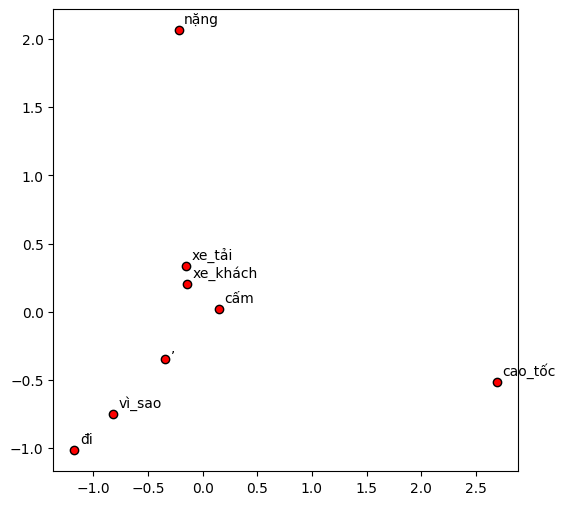

In [50]:
sentence = 'Vì sao cấm xe tải nặng, xe khách đi cao tốc'
sentence = sentence.lower()
sentence = ViTokenizer.tokenize(sentence)
words = sentence.split()

words_scatterplot(model, words)

* The relationships among documents

In [83]:
_, temp_embeddings = embedding("", input_gensim, 100)
mean_temp_embedding = mean_embedded_posts(temp_embeddings)

After tonkenized: 


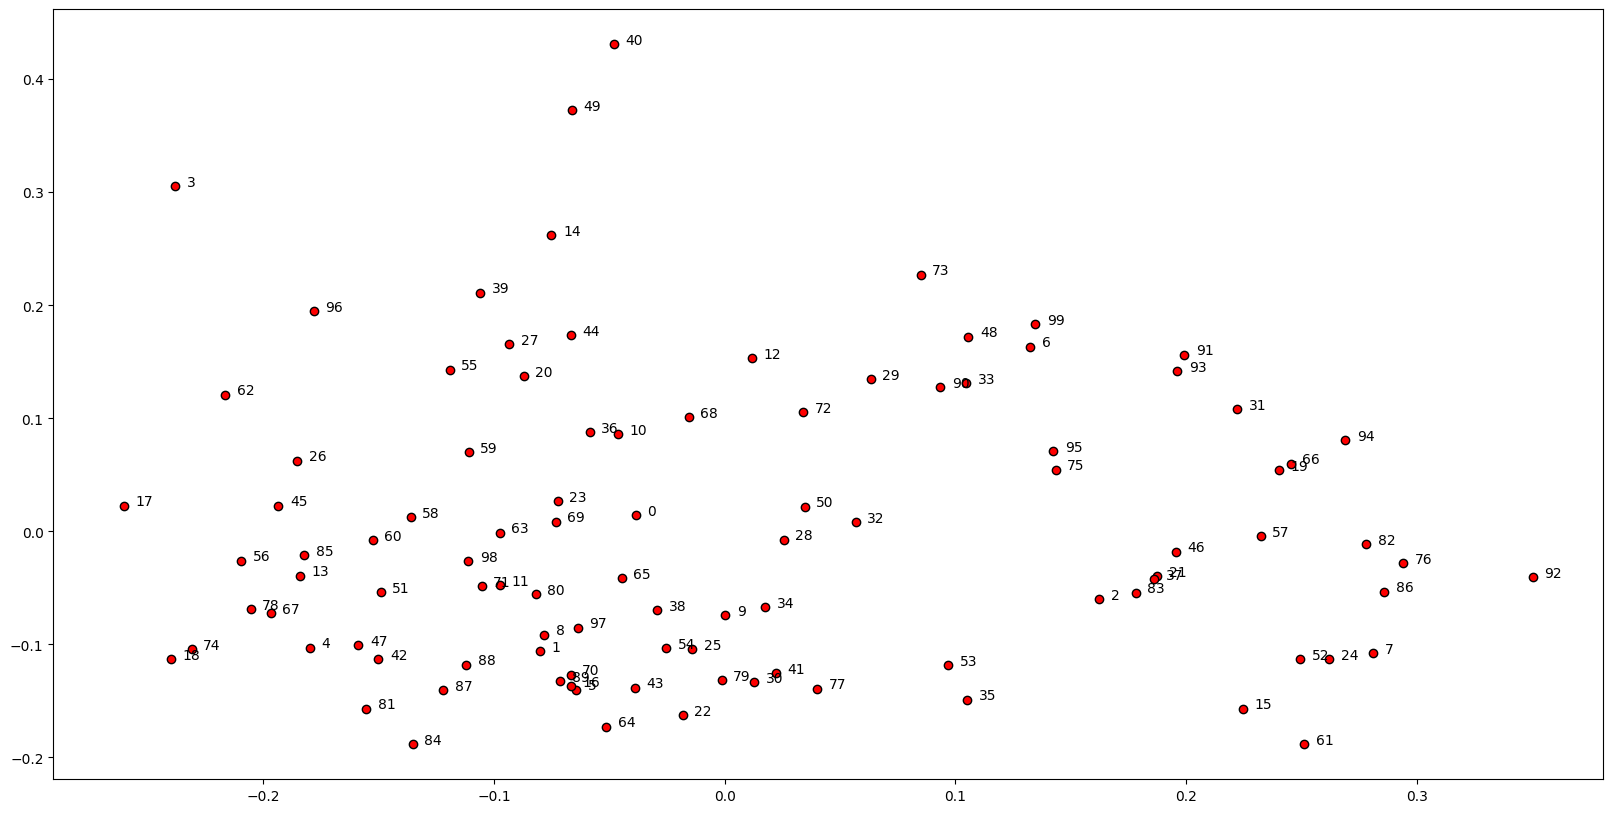

In [84]:
# mean_post_embedding
post_vectors = []
for post_embedding in mean_temp_embedding:
    post_vectors.append(post_embedding.tolist())

twodim = PCA().fit_transform(post_vectors)[:,:2]
index = [i for i,_ in enumerate(mean_temp_embedding)]

plt.figure(figsize=(20,10))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
for doc, (x,y) in zip(index, twodim):
    plt.text(x+0.005, y, doc)